# Pandas: exploratory data analysis

### План:
* Соединения таблиц
* Типы переменных
* Работа с категориальными переменными
* Работа с датой и временем
* Пропущенные значения
* Обнаружение аномалий

Также по ходу знакомимся с визуализацией, но подробнее об этом на следующей паре

In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline 

## Соединения таблиц

Часто хранить информацию в одной таблице бывает довольно неудобно. Когда у вас очень крупная IT-компания, данных настолько много, что если их добавить в одну таблицу, работать с ней будет очень неэффективно по времени и памяти. Поэтому информацию кладут в кучу разных таблиц, а над ними строят специальные *отношения* - так называемые колонки, по которым можно эти таблицы объединять. 

Пример устройства такой структуры хранения данных:

<center>
<img src="https://progi.pro/media/main/82/d3/34/82d334f5b4b49d424a2460e796a30cd5.png" height="200" width="600">
</center>   

### 1. Join

<center>
<img src="https://community.qlik.com/legacyfs/online/87693_all-joins.png" width="300">
</center>

In [2]:
{'Student': ['Tom', 'Ujin', 'Ann', 'Polina','Sam'],
                    'group': ['01', '02', '02', '01','02']}

{'Student': ['Tom', 'Ujin', 'Ann', 'Polina', 'Sam'],
 'group': ['01', '02', '02', '01', '02']}

In [3]:
df1 = pd.DataFrame({'Student': ['Tom', 'Ujin', 'Ann', 'Polina','Sam'],
                    'group': ['01', '02', '02', '01','02']})

df2 = pd.DataFrame({'Name': ['Tom', 'Ujin', 'Ann', 'Polina', 'Kit'],
                    'GPA': ['7.8', '6.4', '8.3', '9', '10']})

display(df1, df2)

,Student,group
0,Tom,01
1,Ujin,02
2,Ann,02
3,Polina,01
4,Sam,02


,Name,GPA
0,Tom,7.8
1,Ujin,6.4
2,Ann,8.3
3,Polina,9
4,Kit,10


In [4]:
# inner join по умолчанию 
pd.merge(df1, df2, left_on='Student', right_on='Name')

,Student,group,Name,GPA
0,Tom,01,Tom,7.8
1,Ujin,02,Ujin,6.4
2,Ann,02,Ann,8.3
3,Polina,01,Polina,9


In [8]:
# left join - оставляем все, что в левой таблице
pd.merge(df1, df2, left_on='Student', 
         right_on='Name', how='left')

,Student,group,Name,GPA
0,Tom,01,Tom,7.8
1,Ujin,02,Ujin,6.4
2,Ann,02,Ann,8.3
3,Polina,01,Polina,9
4,Sam,02,NaN,NaN


In [9]:
# outer join
pd.merge(df1, df2, left_on='Student', 
         right_on='Name', how='outer')

,Student,group,Name,GPA
0,Tom,01,Tom,7.8
1,Ujin,02,Ujin,6.4
2,Ann,02,Ann,8.3
3,Polina,01,Polina,9
4,Sam,02,NaN,NaN
5,NaN,NaN,Kit,10


In [18]:
df1 = df1.set_index('Student')
df1 = df1.reset_index('Student')

In [30]:
df1 = pd.DataFrame({'Student': ['Tom', 'Ujin', 'Ann', 'Polina','Sam', 'Ann'],
                    'group': ['01', '02', '02', '01','02', '09']})

df2 = pd.DataFrame({'Name': ['Tom', 'Ujin', 'Ann', 'Polina', 'Kit', 'Ann'],
                    'GPA': ['7.8', '6.4', '8.3', '9', '10', '15']})

df1 = df1.set_index('Student')
df2 = df2.set_index('Name')

display(df1, df2)

,group
Student,
Tom,01
Ujin,02
Ann,02
Polina,01
Sam,02
Ann,09


,GPA
Name,
Tom,7.8
Ujin,6.4
Ann,8.3
Polina,9
Kit,10
Ann,15


In [31]:
df1.join(df2, how='outer')

,group,GPA
Ann,02,8.3
Ann,02,15
Ann,09,8.3
Ann,09,15
Kit,NaN,10
Polina,01,9
Sam,02,NaN
Tom,01,7.8
Ujin,02,6.4


### 2. Конкатенация строк

In [32]:
df1 = pd.DataFrame({'name': ['Max', 'Phil', 'Vlad', 'Nastya'], 'students': [20, 21, 30, 42]})
df2 = pd.DataFrame({'name': ['Ahmed', 'Andrey'], 'students': [50, 40]})

display(df1, df2)

,name,students
0,Max,20
1,Phil,21
2,Vlad,30
3,Nastya,42


,name,students
0,Ahmed,50
1,Andrey,40


In [33]:
pd.concat([df1, df2])

,name,students
0,Max,20
1,Phil,21
2,Vlad,30
3,Nastya,42
0,Ahmed,50
1,Andrey,40


### Пример на клипах по ютубу

Работать в дальнейшем будем с базой данных, содержащей информацию о клипах ютуба. В базе несколько таблиц, между которыми выстроены соединения. Структура выглядит таким образом:  



<center>
<img src="https://github.com/hse-econ-data-science/dap_2021_spring/blob/main/sem09_pandas/images/struct.png?raw=true" width="600">
</center>

__Описание колонок:__

* `id_title` $-$ уникальный id названия видео
* `id_music_style` $-$ уникальный id жанра
* `id_performer` $-$ уникальный id исполнителя
* `title` $-$ название видео
* `commentCount` $-$ число комментариев
* `dislikeCount` $-$ число дизлайков
* `likeCount` $-$ число лайков
* `music_style` $-$ музыкальный стиль
* `performer` $-$ исполнитель
* `viewCount` $-$ число просмотров
* `commentators_uniq` $-$ число уникальных комментаторов
* `comments_obscene_cnt` $-$ число негативных комментариев
* `video_age` $-$ возраст видео в днях (на момент '2019-03-15')

In [35]:
# подгрузим все таблицы
df_perf = pd.read_csv('performer_table.csv', sep=';')
df_title = pd.read_csv('title_table.csv', sep=';')
df_genre = pd.read_csv('music_style_table.csv', sep=';')

df_stat = pd.read_csv('title_stat_table.csv', sep=';')

In [52]:
df_perf = df_perf.set_index('id_performer')
df_title.set_index('id_title', inplace=True)
df_genre.set_index('id_music_style', inplace=True)

### Задача №1:

Какой исполнитель получает больше всего хейта? (хейт определяется числом негативных комментариев) 

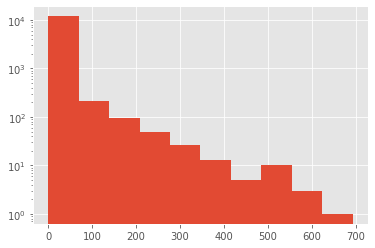

In [39]:
df_stat['comments_obscene_cnt'].hist(log=True);

In [42]:
df_stat['comments_obscene_cnt'].mean()

8.952899139191164

In [61]:
df_agg = (
    df_stat.groupby('id_performer').agg({
      'comments_obscene_cnt': np.median,
      'id_performer': 'count'
  })
)

df_agg.columns = ['obs_median', 'video_cnt']

df_agg.head()

,obs_median,video_cnt
id_performer,,
99991,0.0,126
99992,0.0,280
99993,0.0,405
99994,0.0,415
99995,0.0,298


In [64]:
df_ans = (
    df_agg.join(df_perf)
    .sort_values('obs_median', ascending=False)
)

df_ans.head()

,obs_median,video_cnt,performer
id_performer,,,
100100,269.0,14,пошлая_молли
100101,260.0,11,хаски
100076,130.0,25,face
100050,69.0,72,oxxxymiron
100086,31.0,53,лсп


### Задача №2:

Для каждого жанра выведите число просмотров самого популярного клипа? Кто его исполнитель? Как называется клип?

In [83]:
df_agg = (
    df_stat.groupby('id_music_style')
    .agg({'viewCount' : np.max})
    .reset_index()
    .set_index("viewCount")
)

df_agg = df_agg.join(
    df_stat.set_index("viewCount"), 
    lsuffix='_l'
).reset_index( )

df_agg = df_agg[['viewCount', 'id_music_style',
        'id_title', 'id_performer']]

df_agg = (
    df_agg.set_index("id_music_style")
    .join(df_genre)
)

df_agg = (
    df_agg.set_index("id_title")
    .join(df_title)
)

df_agg = (
    df_agg.set_index("id_performer")
    .join(df_perf)
    .reset_index()
)

colnames = df_agg.columns[-4:]

df_agg[colnames]

,viewCount,music_style,title,performer
0,43969730.0,estrada,"Стас Михайлов и Елена Север - Не зови, не слыш...",михайлов
1,48972150.0,indi,Мальбэк — Равнодушие ft. Сюзанна,мальбэк
2,57860686.0,shanson,Ирина Круг и Виктор Королев - Букет из белых роз,ирина_круг
3,132015566.0,popsa,LOBODA — Твои Глаза,loboda
4,141509635.0,rock,Ленинград — Экспонат,ленинград
5,196812152.0,classic,Four Seasons ~ Vivaldi,classical_channel
6,272047706.0,rap,Miyagi & Эндшпиль feat. Рем Дигга - I Got Love...,miyagi&эндшпиль


## Типы переменных

__Классификация переменных по типу данных:__  

* `int` $-$ числовой, целые числа (1000, 0, -1)
* `float` $-$ числовой, вещественные числа (1.0, 2.564523)
* `object` $-$ строковый (бутырка, JPMorgan, f12aaz//)
* `bool` $-$ булевский (True, False)
* `datetime` $-$ дата (2020-01-12, 23.Jan.20)


__Классификация переменных по смыслу:__  

* `Непрерывные` $-$ содержат непрерывное множество значений на каком-то промежутке (з/п, рост человека, вес буханки хлеба и тд)
* `Категориальные` $-$ содержат конечное небольшое множество значений (возраст детей, тип магазина)
* `Бинарные` $-$ подтип категориальной переменной, имеющей только 2 категории (пол, столицы двух стран)

In [89]:
df = pd.read_csv('youtube_data_short.csv', sep='\t')

In [90]:
# смотрим на типы переменных 
df.dtypes

title                    object
commentCount            float64
dislikeCount            float64
likeCount               float64
music_style              object
performer                object
viewCount               float64
commentators_uniq       float64
comments_obscene_cnt    float64
video_age                 int64
dtype: object

## Работа с категориальными переменными

### Когда категории две:

Отберем только клипы жанра `rock` и `rap`. Представим, что только они нас интересуют. 

In [ ]:
genres_to_keep = ['rock', 'rap']

df_small = df[df.music_style.isin(genres_to_keep)]
df_small.head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
8,"""Hey Tovarish"" Video Shooting",10.0,1.0,34.0,rock,мумий_тролль,3815.0,9.0,0.0,2539
15,"""SOS Матросу!"" - тизер фильма",10.0,4.0,68.0,rock,мумий_тролль,7632.0,5.0,0.0,1739
36,"""ВОИН ДУМА""",4.0,0.0,49.0,rock,король_и_шут,1950.0,NaN,NaN,3819
38,"""Виктор Цой. 50 лет"" Кукрыниксы - Печаль, Конч...",2.0,4.0,65.0,rock,кукрыниксы,9986.0,2.0,0.0,2351
40,"""Всё, что было"". Начало.",23.0,5.0,171.0,rock,ария,11168.0,21.0,1.0,2351


В таком "поддатафрейме" наша колонка `music_style` **имеет тип object** (т.к. в ней находятся строки), а также **является бинарной**, так как содержит всего два значения (`rock` и `rap`)

Однако проблема строковых переменных в том, что многие модели не умеют с ними работать. Компьютеру привычнее оперировать с числами. 

Именно поэтому над строковыми бинарными переменными производят нехитрые манипуляции. Либо кодируют их в числа 1 / 0, либо создают булевский тип True / False, что в какой-то степени тоже самое. 

Попробуем преобразовать нашу бинарную строковую переменную music_style:

In [ ]:
d = {'rock': 1, 'rap': 0}

df_small['is_rock'] = df_small['music_style'].map(d)

<ipython-input-15-21b19c4d8243>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['is_rock'] = df_small['music_style'].map(d)


In [ ]:
df_small.head(2)

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,is_rock
8,"""Hey Tovarish"" Video Shooting",10.0,1.0,34.0,rock,мумий_тролль,3815.0,9.0,0.0,2539,1
15,"""SOS Матросу!"" - тизер фильма",10.0,4.0,68.0,rock,мумий_тролль,7632.0,5.0,0.0,1739,1


### Задача №3: 
Какая доля наблюдений обоих жанров?

In [ ]:
## Ваш код

### Когда категорий больше двух

Вернемся к нашему полному датафрейму. В нем music_style принимает не 2 значения, а целых 7. Что делать в таком случае?

**Наивный метод:** Давайте каждому значению из music_style сопоставим какое-нибудь число. Такой метод называется Label Encoding. Заранее подумайте, какие проблемы может создать такой способ?

In [ ]:
df.music_style.unique()

array(['popsa', 'rock', 'classic', 'indi', 'estrada', 'shanson', 'rap'],
      dtype=object)

In [ ]:
# создадим словарь
d = dict(zip(df.music_style.unique(), np.arange(7)))
print(d)

# сделаем преобразование
df['music_style_int'] = df['music_style'].map(d)

{'popsa': 0, 'rock': 1, 'classic': 2, 'indi': 3, 'estrada': 4, 'shanson': 5, 'rap': 6}


Однако проблема такого способа в том, что мы непроизвольным образом установили **порядок** на наших категориях:
$6 > 5 > 4 > 3 > 2 > 1 > 0 \Rightarrow rap > shanson > estrada > indi > classic > rock > popsa$ 


Чтобы такого избежать, чаще используется другой метод: **One Hot Encoding**

<center>
<img src="https://4.bp.blogspot.com/-iC7OQxsaPY0/XMdB9Q9QahI/AAAAAAAAGoY/qEStugMphDIbUIabd_taWCzTyscXzxOPgCLcBGAs/s1600/human_transpose.JPG" height="200" width="600">
</center>   

В pandas такое преобразование можно сделать с помощью функции `get_dummies()`

In [ ]:
pd.get_dummies(df['music_style']).head()

,classic,estrada,indi,popsa,rap,rock,shanson
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


Такой метод тоже имеет свои проблемы, которые выходят за рамки нашего курса. Например, это полная мультиколлинеарность (или линейная зависимость) столбцов. Подробнее об этом можно посмотреть здесь: https://www.youtube.com/watch?v=k9PPuTmTLMk

## Работа с датой и временем

Для даты и времени в python есть свой тип переменных: datetime / timestamp. Все полезные методы, оперирующие над датами можно найти либо в пакете pandas, либо в дополнительном пакете `datetime`

In [93]:
# получим дату из строки
d = pd.to_datetime('01/01/20')
d

Timestamp('2020-01-01 00:00:00')

In [97]:
d.day_name()

'Wednesday'

In [98]:
d.timestamp()

1577836800.0

In [100]:
# можно получить сегодняшнее число
from datetime import datetime, timedelta
d = datetime.today()
d

datetime.datetime(2021, 4, 7, 9, 14, 9, 649086)

In [103]:
d = d + timedelta(hours=3)
d

datetime.datetime(2021, 4, 7, 12, 14, 9, 649086)

In [104]:
d.year

2021

In [109]:
# преобразуем в строку удобного нам формата
datetime.today().strftime('%Y-%m-%d %H:%M:%S +3GMT')

'2021-04-07 09:16:05 +3GMT'

In [ ]:
from datetime import timedelta

# какой месяц был 50 дней назад?
(datetime.today() - timedelta(days=50)).month

2

### Задача №4: 

В нашем датасете есть колонка `video_age`, которая показывает нам возраст нашего клипа в днях с 15 марта 2019 года. Опираясь на нее, получите для каждого клипа дату его публикации и сохраните в новую колонку. 

In [130]:
def get_date(days):
  download_date = datetime(2019, 3, 15)
  date = download_date - timedelta(days=days)
  return date #.strftime('%Y-%m-%d')

df['fielddate'] = df['video_age'].apply(get_date)

### Задача №5:

Какое распределение кол-ва выпущенных клипов по годам? 

In [136]:
df['year'] =  df['fielddate'].apply(lambda w: w.year)
df.groupby('year')['year'].count()

year
2006       3
2007      63
2008     133
2009     448
2010    1223
2011    1564
2012    1176
2013    1250
2014    1980
2015    1857
2016    1885
2017    2153
2018    4968
2019     421
Name: year, dtype: int64

In [139]:
df['year'].value_counts()

2018    4968
2017    2153
2014    1980
2016    1885
2015    1857
2011    1564
2013    1250
2010    1223
2012    1176
2009     448
2019     421
2008     133
2007      63
2006       3
Name: year, dtype: int64

### Задача №6:

Выведите месяц, в течение которого на ютуб опубликовали больше всего клипов

## Пропущенные значения

Пропуски в данных $-$ это противная проблема, с которой можно столкнуться при работе. Пропуски возникают практически всегда. Причинами пропусков может быть, например, технические возможности вашего парсера, который не смог достать часть информации из сайта, либо, например, если вы Юрий Дудь и опрашиваете людей об их заработке, собирая статистику для дальнейшего исследования, то вряд ли каждый человек захочет вам ответить. 

### Выявление

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19124 entries, 0 to 19123
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 19124 non-null  object 
 1   commentCount          18914 non-null  float64
 2   dislikeCount          18850 non-null  float64
 3   likeCount             18850 non-null  float64
 4   music_style           19124 non-null  object 
 5   performer             19124 non-null  object 
 6   viewCount             19123 non-null  float64
 7   commentators_uniq     12314 non-null  float64
 8   comments_obscene_cnt  12314 non-null  float64
 9   video_age             19124 non-null  int64  
 10  music_style_int       19124 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.6+ MB


In [ ]:
df.isnull().sum()

title                      0
commentCount             210
dislikeCount             274
likeCount                274
music_style                0
performer                  0
viewCount                  1
commentators_uniq       6810
comments_obscene_cnt    6810
video_age                  0
music_style_int            0
dtype: int64

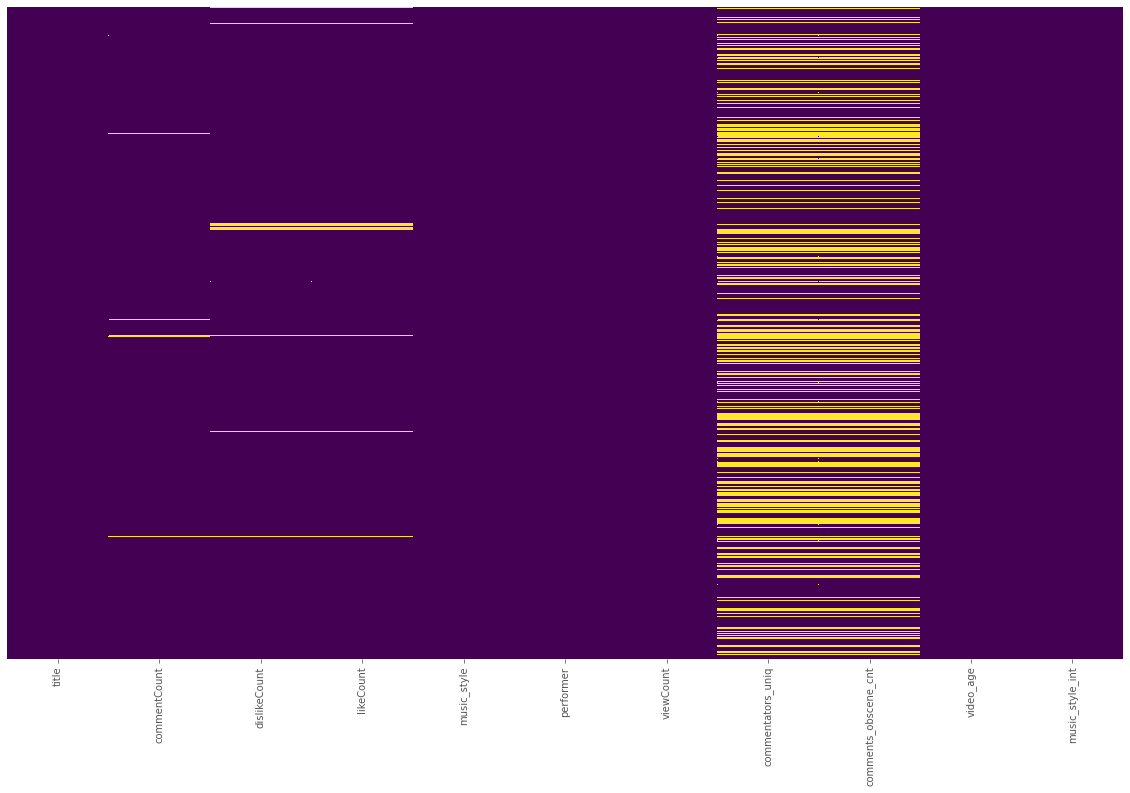

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Удаление

In [ ]:
print(df.shape)

# по умолчанию удаляет строки, где есть na
print(df.dropna().shape)

# можем удалять столбцы, где есть хотя бы один пропуск
print(df.dropna(axis=1).shape)

(19124, 11)
(12116, 11)
(19124, 5)


Часто удаление слишком дорогая операция, так как избавляемся от кучи данных, которых и так частенько бывает мало

### Заполнение

In [ ]:
# было
ser = pd.Series([24, np.nan, 27, 2])
ser

0    24.0
1     NaN
2    27.0
3     2.0
dtype: float64

In [ ]:
# заполняем нулем
ser.fillna(0).head()

0    24.0
1     0.0
2    27.0
3     2.0
dtype: float64

In [ ]:
# заполняем предыдущим значением
ser.fillna(method='ffill').head()

0    24.0
1    24.0
2    27.0
3     2.0
dtype: float64

In [ ]:
# заполняем последующим значением
ser.fillna(method='bfill').head()

0    24.0
1    27.0
2    27.0
3     2.0
dtype: float64

### Задача №7:

Заполните пропуски в столбцах таблицы по клипам средними

In [ ]:
## Ваш код

## Обнаружение аномалий

Аномалии в данных $-$ это столь же частая проблема, что и пропущенные значения, однако более серьезная. Посмотрим на примере, как аномалии могут все испортить:  

### Оцениваем средний рост людей в школьном классе:

Представим, что мы хотим оценить средний рост людей в школьном классе. Имеем следующую таблицу:

In [ ]:
students = pd.DataFrame({'student': ['Max', 'Ahmed', 'Nastya', 'Vlad'],
                        'height_cm': [170, 165, 171, 168]})

students

,student,height_cm
0,Max,170
1,Ahmed,165
2,Nastya,171
3,Vlad,168


Найдем среднее:

In [ ]:
students.height_cm.mean()

168.5

Теперь представим, что в наш класс пришел новенький Филипп, который остался на второй год из-за того, что играл в баскетбол, а не учился. У нас в таблице появилось новое наблюдение, попробуем оценить рост теперь. 

In [ ]:
students.loc[4] = ['Phil', 210]
students

,student,height_cm
0,Max,170
1,Ahmed,165
2,Nastya,171
3,Vlad,168
4,Phil,210


In [ ]:
students.height_cm.mean()

176.8

Видим, что значение среднего роста *сильно изменилось* из-за одного человека, имеющего неспецифичный (*аномальный*) рост для нашей выборки. Связано это с тем, что Филипп пришел к нам в класс *из другого распределения* $-$ распределения баскетболистов. Именно поэтому значение нашего среднего теперь *сильно завышено*, и мы таким образом можем собрать *ошибочную статистику*.

Возможное решение: использовать для агрегированной статистики квантили (например, медиану)

In [ ]:
students.height_cm.median()

170.0

**ЗАПОМНИТЬ: Медиана в отличие от среднего устойчива к выбросам!**

### Выявление и удаление выбросов на примере клипов:

In [ ]:
df.likeCount.mean()

5735.014482758621

In [ ]:
df.likeCount.median()

100.0

Видим сильное завышение среднего по лайкам в отличие от медианы. Причина - аномалии. 

На распределении виден длинный хвост:

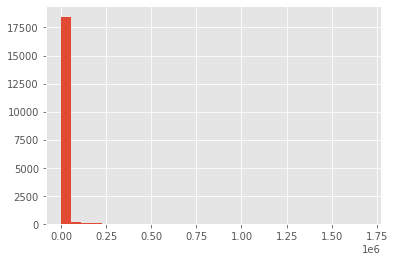

In [ ]:
df.likeCount.hist(bins=30);

Если не особо виден, то можно посмотреть на лог шкалу:

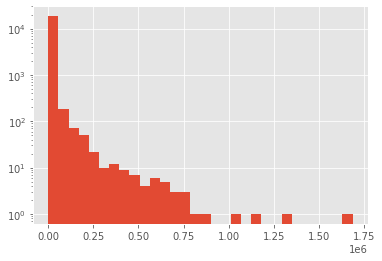

In [ ]:
df.likeCount.hist(bins=30, log=True);

То есть у нас в выборке есть клипы с аномальным кол-вом лайков - так называемые хиты. Они то нам и портят всю статистику.  

Попробуем от них избавиться:

**Способ №1:** Откинем $1\%$ нашей выборки клипов, у которых больше всего лайков. Воспользуемся для этого $99\%$ персентилем.

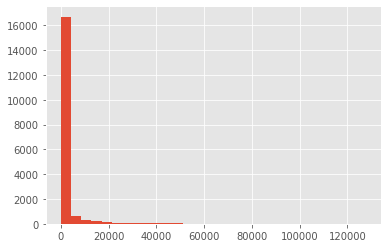

In [ ]:
threshold = df.likeCount.quantile(0.99)
df_clear = df[df.likeCount <= threshold]

# визуализируем
df_clear.likeCount.hist(bins=30);

**Способ №2:** Считаем аномалиями все наблюдения, которые оказались за пределами трех межквартильных отклонений.  

### Задача №8:

Реализовать этот метод. Межквартильное отклонение - это разница между 25-м и 75-м перцентилями. 

In [ ]:
## Ваш код

Стоит отметить, что иногда искать аномалии требуется не только для обработки данных. Порой, поиск аномалий $-$ это и есть задача. Так, например, аномалиями являются мошенники банка, чье поведение отличается от обычных пользователей. И поиск таких людей и является нашей задачей. 

# Вопросы

__А как превратить .txt файл в json прямо в питоне?__

In [ ]:
with open(koko) as f:
  x = f.read()

In [ ]:
x = '''[
    {
        "username": "bober38",
        "commit_time": "2021/03/12 05:45:02",
        "files": [
            {
                "name": "utils/net.py",
                "changed_lines": 85
            }
        ]
    }]'''

In [ ]:
import json
dct = json.loads(x)
dct[0]['files']

[{'changed_lines': 85, 'name': 'utils/net.py'}]

In [ ]:
json.dumps(dct[0]['files'])

'[{"name": "utils/net.py", "changed_lines": 85}]'